# Practical Application III: Comparing Classifiers

### A.Morato
#### BH-PCMLAI January 2024

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  

### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.

### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data provided represents 17 campaigns that occurred between May 2008 and November 2010.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
#Import of needed modules

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import pylab as pl

from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

from sklearn import set_config
set_config(display="diagram")

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df[df['y'] == 'yes'].shape[0]

4640

In [7]:
df[df['y'] == 'no'].shape[0]

36548

The dataset is heavily unbalanced towards "no"

#### 3.1 Missing Values

The dataset appears complete without missing values.

In [8]:
#Check of NULL values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### 3.2 Check Duplicated Rows

In [9]:
#Check of duplicates
df.duplicated().sum()

12

In [10]:
# Drop duplicates
df = df.drop_duplicates()

#### 3.3 Inspection of Values in the Dataset

In [11]:
#Number of unique values
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [12]:
#Inspection of Values of the features
for col in df:
    print("'" + col + "'" + 'values:')
    print(df[col].unique())
    print('*************************************************')

'age'values:
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
*************************************************
'job'values:
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
*************************************************
'marital'values:
['married' 'single' 'divorced' 'unknown']
*************************************************
'education'values:
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
*************************************************
'default'values:
['no' 'unknown' 'yes']
*************************************************
'housing'values:
['no' 'yes' 'unknown']
*************************************************
'loan'values

#### 3.4 Managment of 'unknown' Values

Some fields have values `unknown`. I'd like to understand how much of the whole dataset is affected by this values.
Fields considered are:
- `job`
- `marital`
- `education`
- `default`
- `housing`
- `loan`

In [13]:
unknown_job = df[df['job'] == 'unknown'].shape[0] / df.shape[0] * 100
unknown_marital = df[df['marital'] == 'unknown'].shape[0] / df.shape[0] * 100
unknown_education = df[df['education'] == 'unknown'].shape[0] / df.shape[0] * 100
unknown_default = df[df['default'] == 'unknown'].shape[0] / df.shape[0] * 100
unknown_housing = df[df['housing'] == 'unknown'].shape[0] / df.shape[0] * 100
unknown_loan = df[df['loan'] == 'unknown'].shape[0] / df.shape[0] * 100

print(f'Percentage of rows with "unknown" job: {np.round(unknown_job, 1)}')
print(f'Percentage of rows with "unknown" marital: {np.round(unknown_marital, 1)}')
print(f'Percentage of rows with "unknown" education: {np.round(unknown_education, 1)}')
print(f'Percentage of rows with "unknown" default: {np.round(unknown_default, 1)}')
print(f'Percentage of rows with "unknown" housing: {np.round(unknown_housing, 1)}')
print(f'Percentage of rows with "unknown" loan: {np.round(unknown_loan, 1)}')

Percentage of rows with "unknown" job: 0.8
Percentage of rows with "unknown" marital: 0.2
Percentage of rows with "unknown" education: 4.2
Percentage of rows with "unknown" default: 20.9
Percentage of rows with "unknown" housing: 2.4
Percentage of rows with "unknown" loan: 2.4


Percentages are pretty low (excepted `default` which is still manageble though). I decide to eliminate rows with "unknown" values: they can be indeed considered as 'missing' values.

In [14]:
df = df[df['job'] != 'unknown']
df = df[df['marital'] != 'unknown']
df = df[df['education'] != 'unknown']
df = df[df['default'] != 'unknown']
df = df[df['housing'] != 'unknown']
df = df[df['loan'] != 'unknown']

In [15]:
#Check that 'unknown' values disappeared

unknown_job = df[df['job'] == 'unknown'].shape[0] / df.shape[0] * 100
unknown_marital = df[df['marital'] == 'unknown'].shape[0] / df.shape[0] * 100
unknown_education = df[df['education'] == 'unknown'].shape[0] / df.shape[0] * 100
unknown_default = df[df['default'] == 'unknown'].shape[0] / df.shape[0] * 100
unknown_housing = df[df['housing'] == 'unknown'].shape[0] / df.shape[0] * 100
unknown_loan = df[df['loan'] == 'unknown'].shape[0] / df.shape[0] * 100

print(f'Percentage of rows with "unknown" job: {np.round(unknown_job, 1)}')
print(f'Percentage of rows with "unknown" marital: {np.round(unknown_marital, 1)}')
print(f'Percentage of rows with "unknown" education: {np.round(unknown_education, 1)}')
print(f'Percentage of rows with "unknown" default: {np.round(unknown_default, 1)}')
print(f'Percentage of rows with "unknown" housing: {np.round(unknown_housing, 1)}')
print(f'Percentage of rows with "unknown" loan: {np.round(unknown_loan, 1)}')

Percentage of rows with "unknown" job: 0.0
Percentage of rows with "unknown" marital: 0.0
Percentage of rows with "unknown" education: 0.0
Percentage of rows with "unknown" default: 0.0
Percentage of rows with "unknown" housing: 0.0
Percentage of rows with "unknown" loan: 0.0


In [16]:
#Inspection of values of the features after removing 'unknown' values
for col in df:
    print("'" + col + "'" + 'values:')
    print(df[col].unique())
    print('*************************************************')

'age'values:
[56 37 40 59 24 25 29 57 35 50 30 55 41 54 34 52 32 38 45 39 60 53 51 48
 44 31 49 33 42 36 43 46 28 58 27 47 26 22 23 20 21 18 70 61 66 76 67 73
 88 95 19 68 75 63 62 65 72 64 71 69 78 85 80 79 77 83 81 74 82 17 87 91
 94 86 84 89]
*************************************************
'job'values:
['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'unemployed'
 'retired' 'entrepreneur' 'management' 'student' 'self-employed']
*************************************************
'marital'values:
['married' 'single' 'divorced']
*************************************************
'education'values:
['basic.4y' 'high.school' 'basic.6y' 'professional.course' 'basic.9y'
 'university.degree' 'illiterate']
*************************************************
'default'values:
['no' 'yes']
*************************************************
'housing'values:
['no' 'yes']
*************************************************
'loan'values:
['no' 'yes']
******************************************

In [17]:
df[df['y'] == 'yes'].shape[0]

3858

In [18]:
df[df['y'] == 'no'].shape[0]

26620

#### 3.5 Considerations about 'duration' feature

Reading the documentation of the dataset, this is the description of feature `duration`:


"last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model."


This means that `duration` is somehow "too much correlated" with target value. That is why it is dropped from the analysis.

In [19]:
df = df.drop(['duration'], axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30478 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30478 non-null  int64  
 1   job             30478 non-null  object 
 2   marital         30478 non-null  object 
 3   education       30478 non-null  object 
 4   default         30478 non-null  object 
 5   housing         30478 non-null  object 
 6   loan            30478 non-null  object 
 7   contact         30478 non-null  object 
 8   month           30478 non-null  object 
 9   day_of_week     30478 non-null  object 
 10  campaign        30478 non-null  int64  
 11  pdays           30478 non-null  int64  
 12  previous        30478 non-null  int64  
 13  poutcome        30478 non-null  object 
 14  emp.var.rate    30478 non-null  float64
 15  cons.price.idx  30478 non-null  float64
 16  cons.conf.idx   30478 non-null  float64
 17  euribor3m       30478 non-null 

#### 3.6 Understanding Distribution of Target Feature (y)

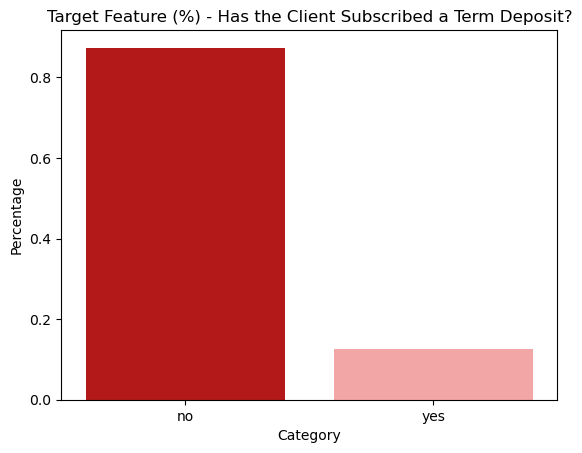

,Category,Percentage
0,no,0.873417
1,yes,0.126583


In [21]:
data = pd.DataFrame(df['y'].value_counts(normalize=True)).reset_index()
data.columns = ['Category', 'Percentage']  # Rename columns for clarity

plt.rcdefaults()
palette = {'yes': '#ff9999', 'no': '#cc0000'}  # Light red for 'yes', dark red for 'no'
plt.title("Target Feature (%) - Has the Client Subscribed a Term Deposit?")
sns.barplot(x='Category', y='Percentage', data=data, palette=palette)
plt.show()

data

The dataset appears clearly very unbalanced toward "no" group.

#### 2.7 Analysis of Numerical Features ( with Outliners and Distribution)

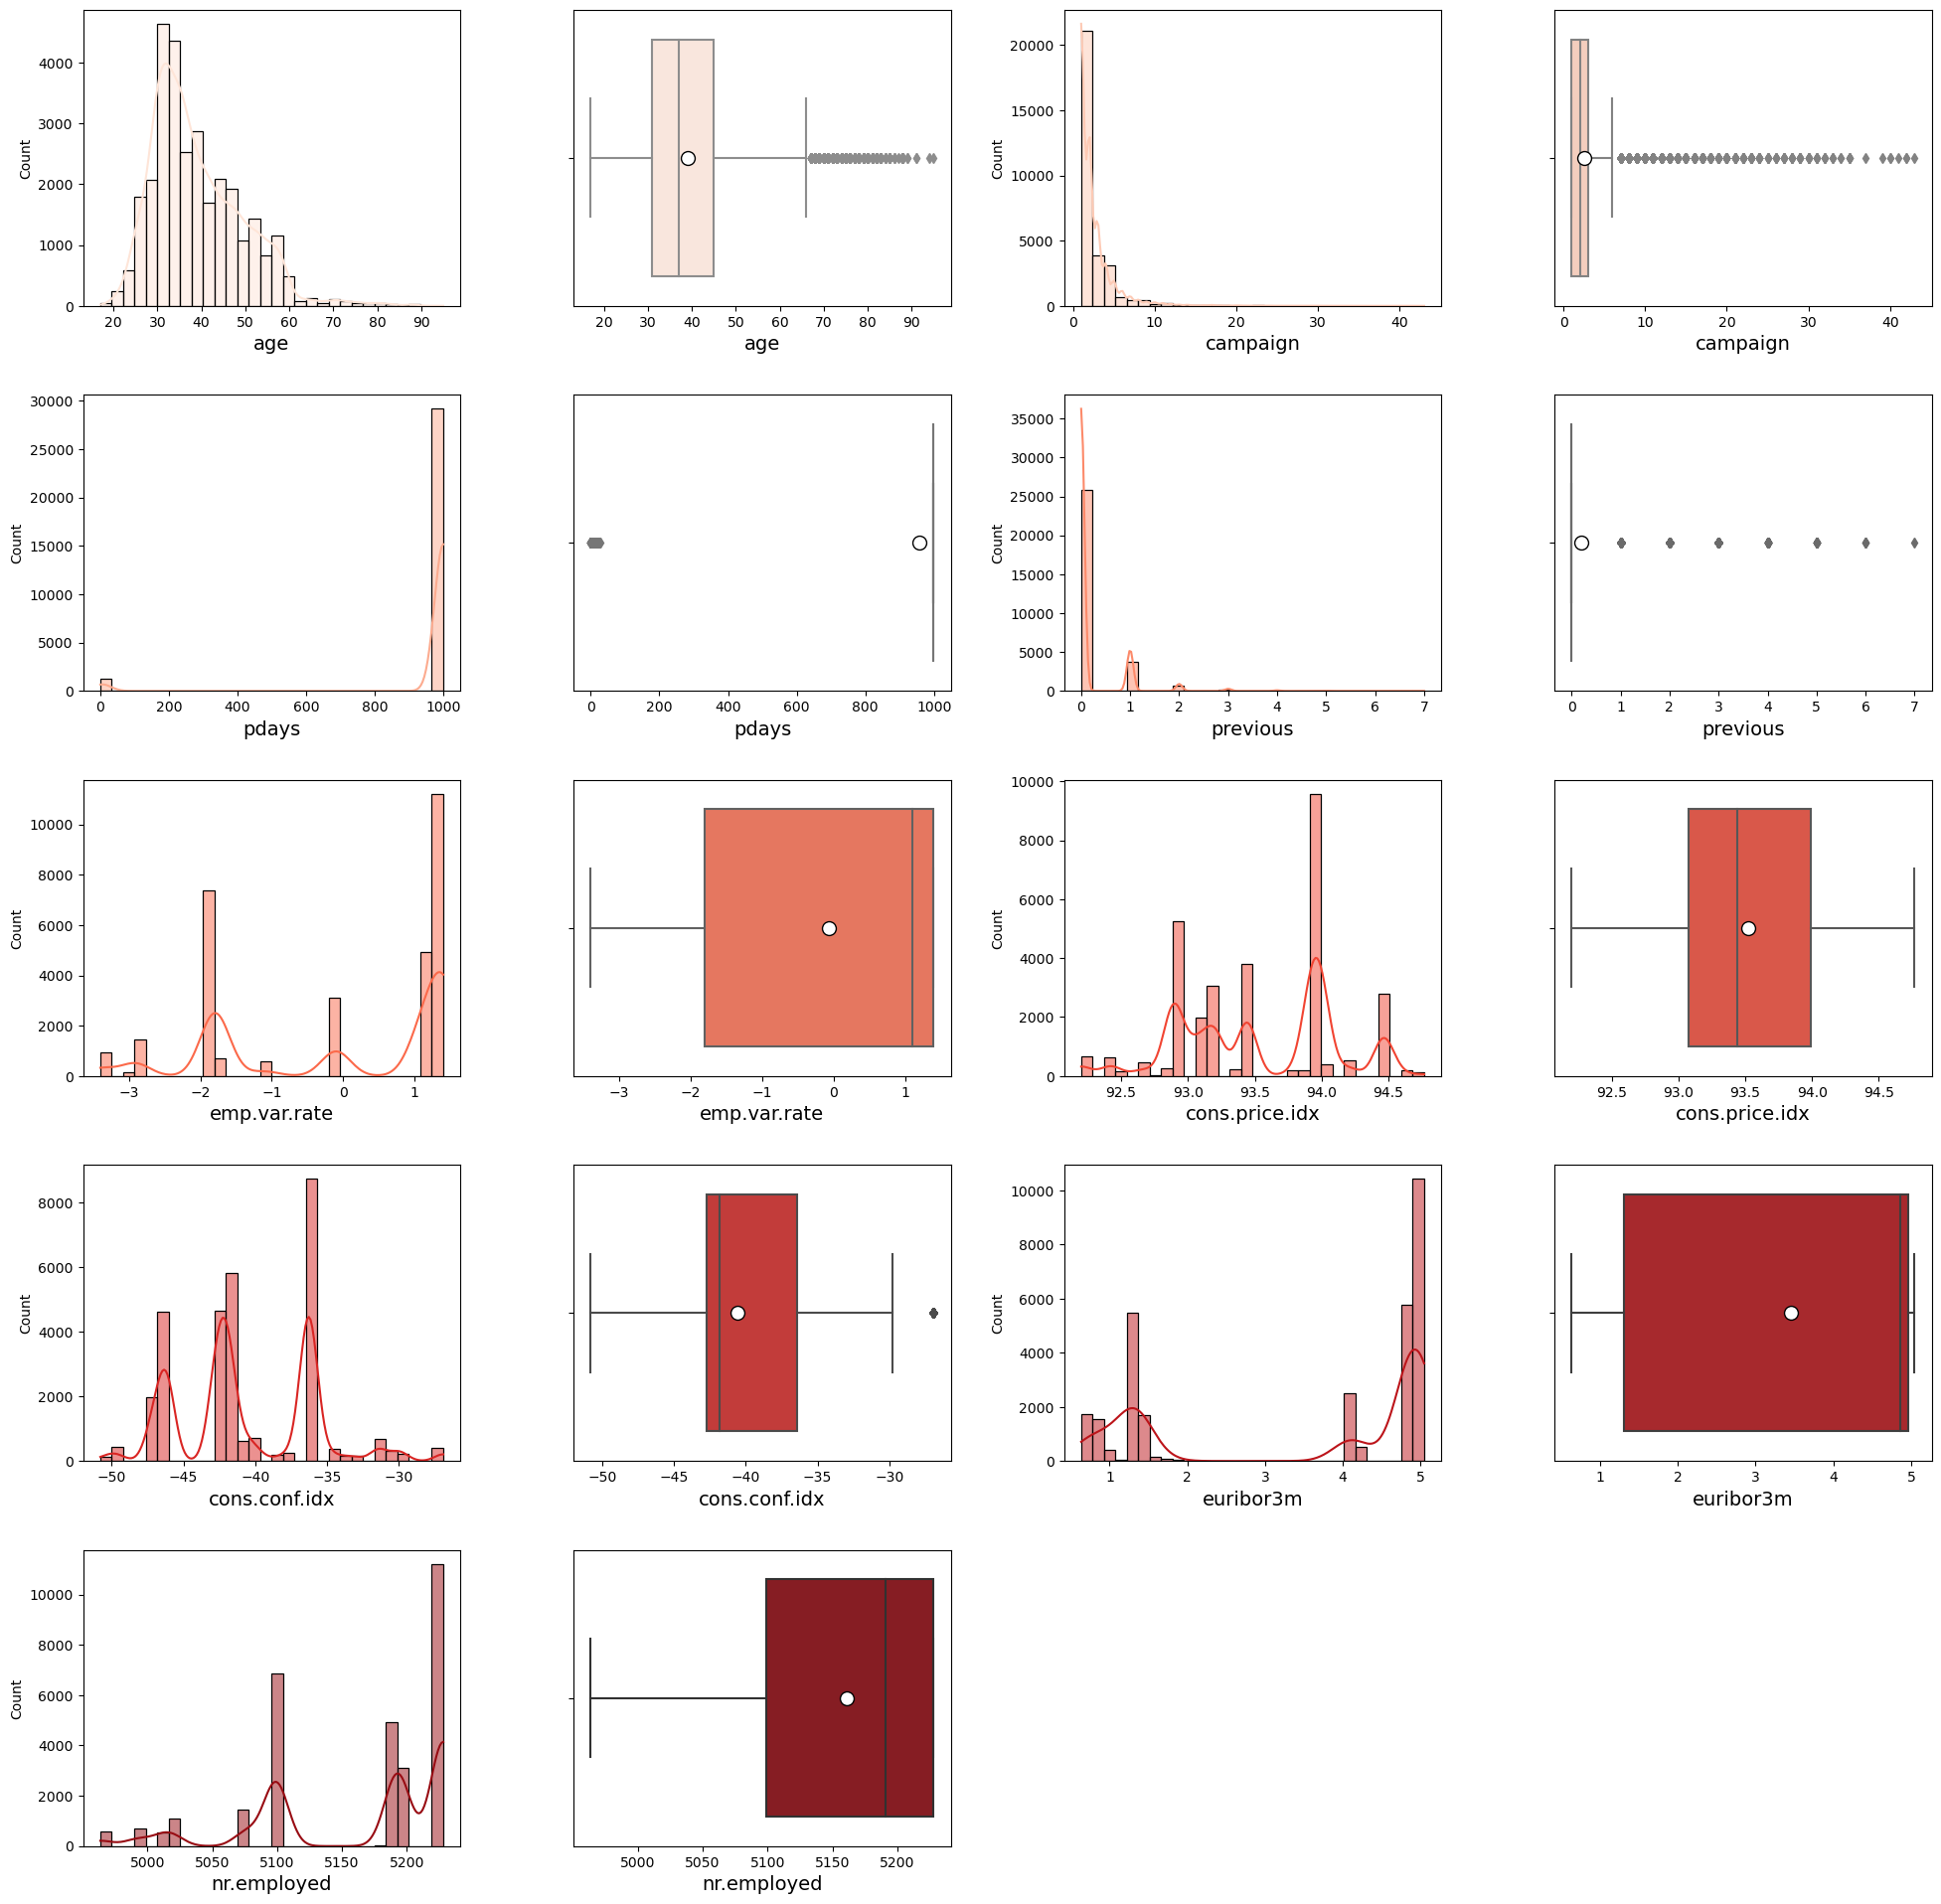

In [22]:
# Variables to plot in a matrix of graphs
variables = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
             'cons.conf.idx', 'euribor3m', 'nr.employed']

# Create a color palette with a scale of reds
colors = sns.color_palette("Reds", n_colors=len(variables))

# Create a 5x4 grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(24, 24))
axes = axes.flatten()

# Loop through the variables and create plots
for i, var in enumerate(variables):
    # Histogram
    ax1 = sns.histplot(data=df, x=var, kde=True, color=colors[i], bins=30, ax=axes[2*i])
    ax1.set_xlabel(var, fontsize=14)
    
    # Boxplot
    ax2 = sns.boxplot(x=df[var], showmeans=True, meanprops={"marker":"o",
                                                            "markerfacecolor":"white",
                                                            "markeredgecolor":"black",
                                                            "markersize":"10"},
                      ax=axes[2*i + 1], color=colors[i])
    ax2.set_xlabel(var, fontsize=14)

# Hide unused axes
for j in range(2*len(variables), len(axes)):
    axes[j].set_visible(False)

# Adjust layout with spacing
plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust the space between plots

# Display the plot
plt.show()

Some of these features seem very umbalanced. However they generally make sense in context. The only numeric features that I would 'adjust' are `age` and `pdays`.

`age` can be rebalanced by removing the outliners and center the population inside the quartiles. Regarding `pdays`, this has an arbitrary value of 999 when the consumer has never been contacted. In this case with the vast majority of the dataset 'never contacted' (96%), I believe the easiest approach is transforming this feature into a binary one. The original `pdays` column is removed, and a new binary one called `contacted` is introduced.

In [23]:
pd.DataFrame(df['pdays'].value_counts(normalize=True)).sort_values(by=['pdays'])

,pdays
27,0.000033
25,0.000033
26,0.000033
21,0.000066
19,0.000098
22,0.000098
18,0.000164
17,0.000197
16,0.000262
8,0.000427


In [24]:
df['contacted'] = (df['pdays'] != 999).astype(int)
df = df.drop(['pdays'], axis=1)
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [25]:
#Check of the newly added column
df['contacted'].value_counts()

0    29168
1     1310
Name: contacted, dtype: int64

Regarding the feature `age`, I filter the outliners.

In [26]:
# Variables to filter
variables = ['age']

In [27]:
def outlierstreat(data, variable):
    first_quartile = data[variable].quantile(0.25)
    third_quartile = data[variable].quantile(0.75)
    iqr = third_quartile - first_quartile
    lower = first_quartile - 1.5 * iqr
    upper = third_quartile + 1.5 * iqr

    # Correcting the condition for under-age customers: only considered persons >18y,
    # so legally able to execute banking operations in Europe
    lower = max(lower, 18)
    
    print(f'{variable} bounds: ', lower, upper)
    # Filter the data
    filtered_data = data[(data[variable] <= upper) & (data[variable] >= lower)]
    return filtered_data

In [28]:
for variable in variables:
    df = outlierstreat(df, variable)

age bounds:  18 66.0


The new age limits make sense to me: 18-70y is a very good window, collecting the most active users (especially between 30-60y).

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30019 entries, 0 to 41186
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30019 non-null  int64  
 1   job             30019 non-null  object 
 2   marital         30019 non-null  object 
 3   education       30019 non-null  object 
 4   default         30019 non-null  object 
 5   housing         30019 non-null  object 
 6   loan            30019 non-null  object 
 7   contact         30019 non-null  object 
 8   month           30019 non-null  object 
 9   day_of_week     30019 non-null  object 
 10  campaign        30019 non-null  int64  
 11  previous        30019 non-null  int64  
 12  poutcome        30019 non-null  object 
 13  emp.var.rate    30019 non-null  float64
 14  cons.price.idx  30019 non-null  float64
 15  cons.conf.idx   30019 non-null  float64
 16  euribor3m       30019 non-null  float64
 17  nr.employed     30019 non-null 

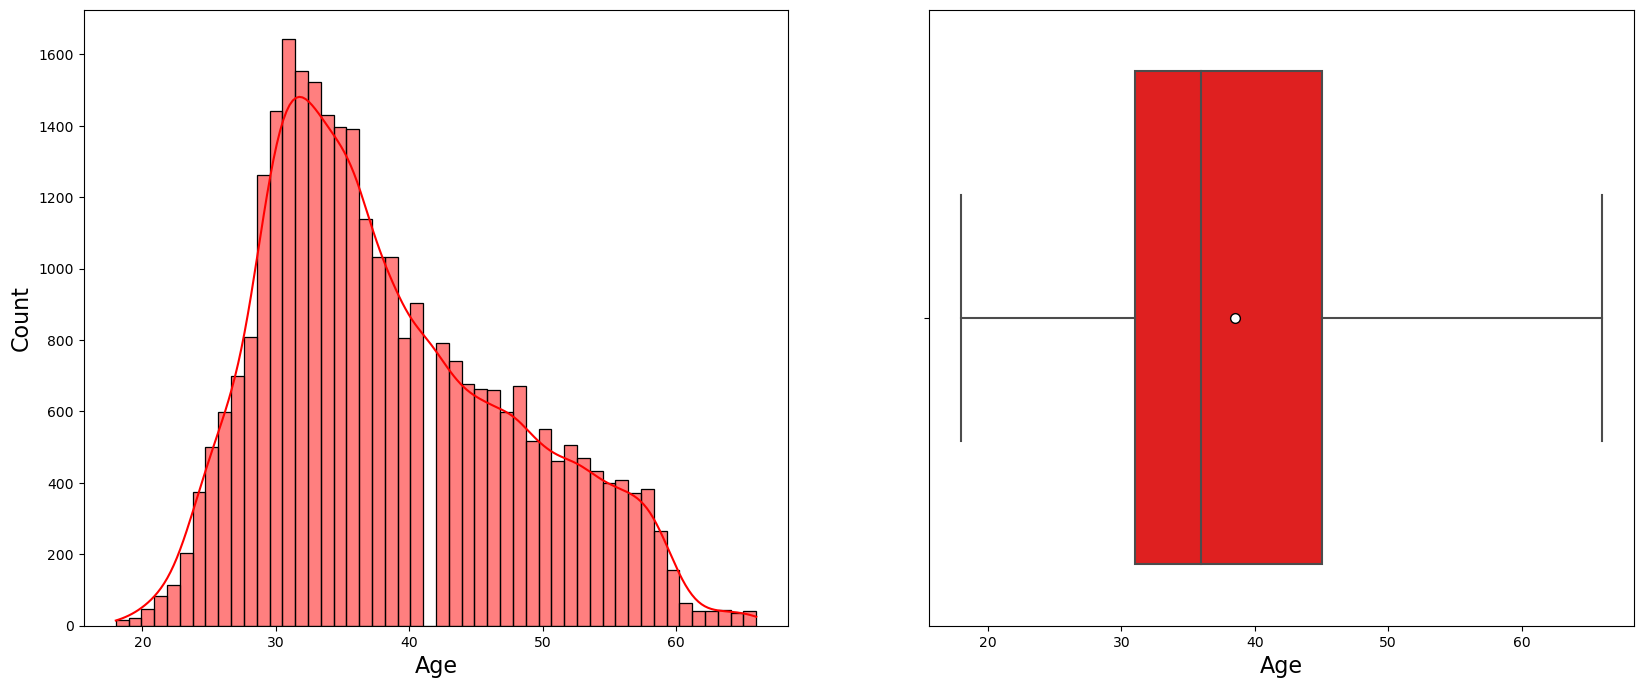

In [30]:
# New distribution of 'age' (>18y)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

ax=sns.histplot(data=df, x='age', kde=True, color="red", bins=50, ax=axes[0])
ax.set_xlabel('Age', fontsize=16)
ax.set_ylabel('Count', fontsize=16)

ax = sns.boxplot(x=df['age'],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="red")
ax.set_xlabel('Age',fontsize=16)

plt.show()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30019 entries, 0 to 41186
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30019 non-null  int64  
 1   job             30019 non-null  object 
 2   marital         30019 non-null  object 
 3   education       30019 non-null  object 
 4   default         30019 non-null  object 
 5   housing         30019 non-null  object 
 6   loan            30019 non-null  object 
 7   contact         30019 non-null  object 
 8   month           30019 non-null  object 
 9   day_of_week     30019 non-null  object 
 10  campaign        30019 non-null  int64  
 11  previous        30019 non-null  int64  
 12  poutcome        30019 non-null  object 
 13  emp.var.rate    30019 non-null  float64
 14  cons.price.idx  30019 non-null  float64
 15  cons.conf.idx   30019 non-null  float64
 16  euribor3m       30019 non-null  float64
 17  nr.employed     30019 non-null 

#### Business Objective

The increasingly vast number of marketing campaigns over time has reduced its effect on the general public. Furthermore, economical pressures and competition has led marketing managers to invest on directed campaigns with a strict and rigorous selection of contacts. Such direct campaigns can be enhanced through an application of Data Analysis and Machine Learning techniques.

This work describes an implementation of a DM project based on the CRISP-DM methodology. Real-world data were collected from a Portuguese marketing campaign related with bank deposit subscription. The business objective is to find a model that can explain success of a contact (i.e. if the client subscribes the deposit). Such model can increase campaign efficiency by identifying the main characteristics that affect success, helping in a better management of the available resources (e.g. human effort, phone calls, time) and selection of a high quality and affordable set of potential buying customers.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

Prior of any analysis and modeling, appropriate encoding and transformations have to be applied to the no-mumerical features. If I properly understand the requirements, I consider all the features but last ones, which cover the status of the current economic scenario.

In [32]:
categorical_columns = ['job', 'marital', 'education', 'contact', 'poutcome']
binary_columns = ['default', 'housing', 'loan', 'y']

month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

day_mapping = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5
}

In [33]:
df_encoded = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
                'month', 'day_of_week', 'campaign', 'previous', 'poutcome', 'contacted',
                 'y']]

In [34]:
# Binary Features
df_encoded['default'] = df_encoded['default'].map({'yes': True, 'no': False})
df_encoded['housing'] = df_encoded['housing'].map({'yes': True, 'no': False})
df_encoded['loan'] = df_encoded['loan'].map({'yes': True, 'no': False})
df_encoded['y'] = df_encoded['y'].map({'yes': True, 'no': False})

In [35]:
# Ordinal Features
df_encoded['month'] = df_encoded['month'].map(month_mapping)
df_encoded['day_of_week'] = df_encoded['day_of_week'].map(day_mapping)

In [36]:
df_encoded.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,contacted,y
0,56,housemaid,married,basic.4y,False,False,False,telephone,5,1,1,0,nonexistent,0,False
2,37,services,married,high.school,False,True,False,telephone,5,1,1,0,nonexistent,0,False
3,40,admin.,married,basic.6y,False,False,False,telephone,5,1,1,0,nonexistent,0,False
4,56,services,married,high.school,False,False,True,telephone,5,1,1,0,nonexistent,0,False
6,59,admin.,married,professional.course,False,False,False,telephone,5,1,1,0,nonexistent,0,False


In [37]:
df_encoded = pd.get_dummies(df_encoded, columns=categorical_columns)

In [38]:
df_encoded.head(5)

,age,default,housing,loan,month,day_of_week,campaign,previous,contacted,y,...,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,False,False,False,5,1,1,0,0,False,...,0,0,0,0,0,0,1,0,1,0
2,37,False,True,False,5,1,1,0,0,False,...,0,1,0,0,0,0,1,0,1,0
3,40,False,False,False,5,1,1,0,0,False,...,0,0,0,0,0,0,1,0,1,0
4,56,False,False,True,5,1,1,0,0,False,...,0,1,0,0,0,0,1,0,1,0
6,59,False,False,False,5,1,1,0,0,False,...,0,0,0,1,0,0,1,0,1,0


In [79]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30019 entries, 0 to 41186
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            30019 non-null  int64
 1   default                        30019 non-null  bool 
 2   housing                        30019 non-null  bool 
 3   loan                           30019 non-null  bool 
 4   month                          30019 non-null  int64
 5   day_of_week                    30019 non-null  int64
 6   campaign                       30019 non-null  int64
 7   previous                       30019 non-null  int64
 8   contacted                      30019 non-null  int32
 9   y                              30019 non-null  bool 
 10  job_admin.                     30019 non-null  uint8
 11  job_blue-collar                30019 non-null  uint8
 12  job_entrepreneur               30019 non-null  uint8
 13  job_housemaid   

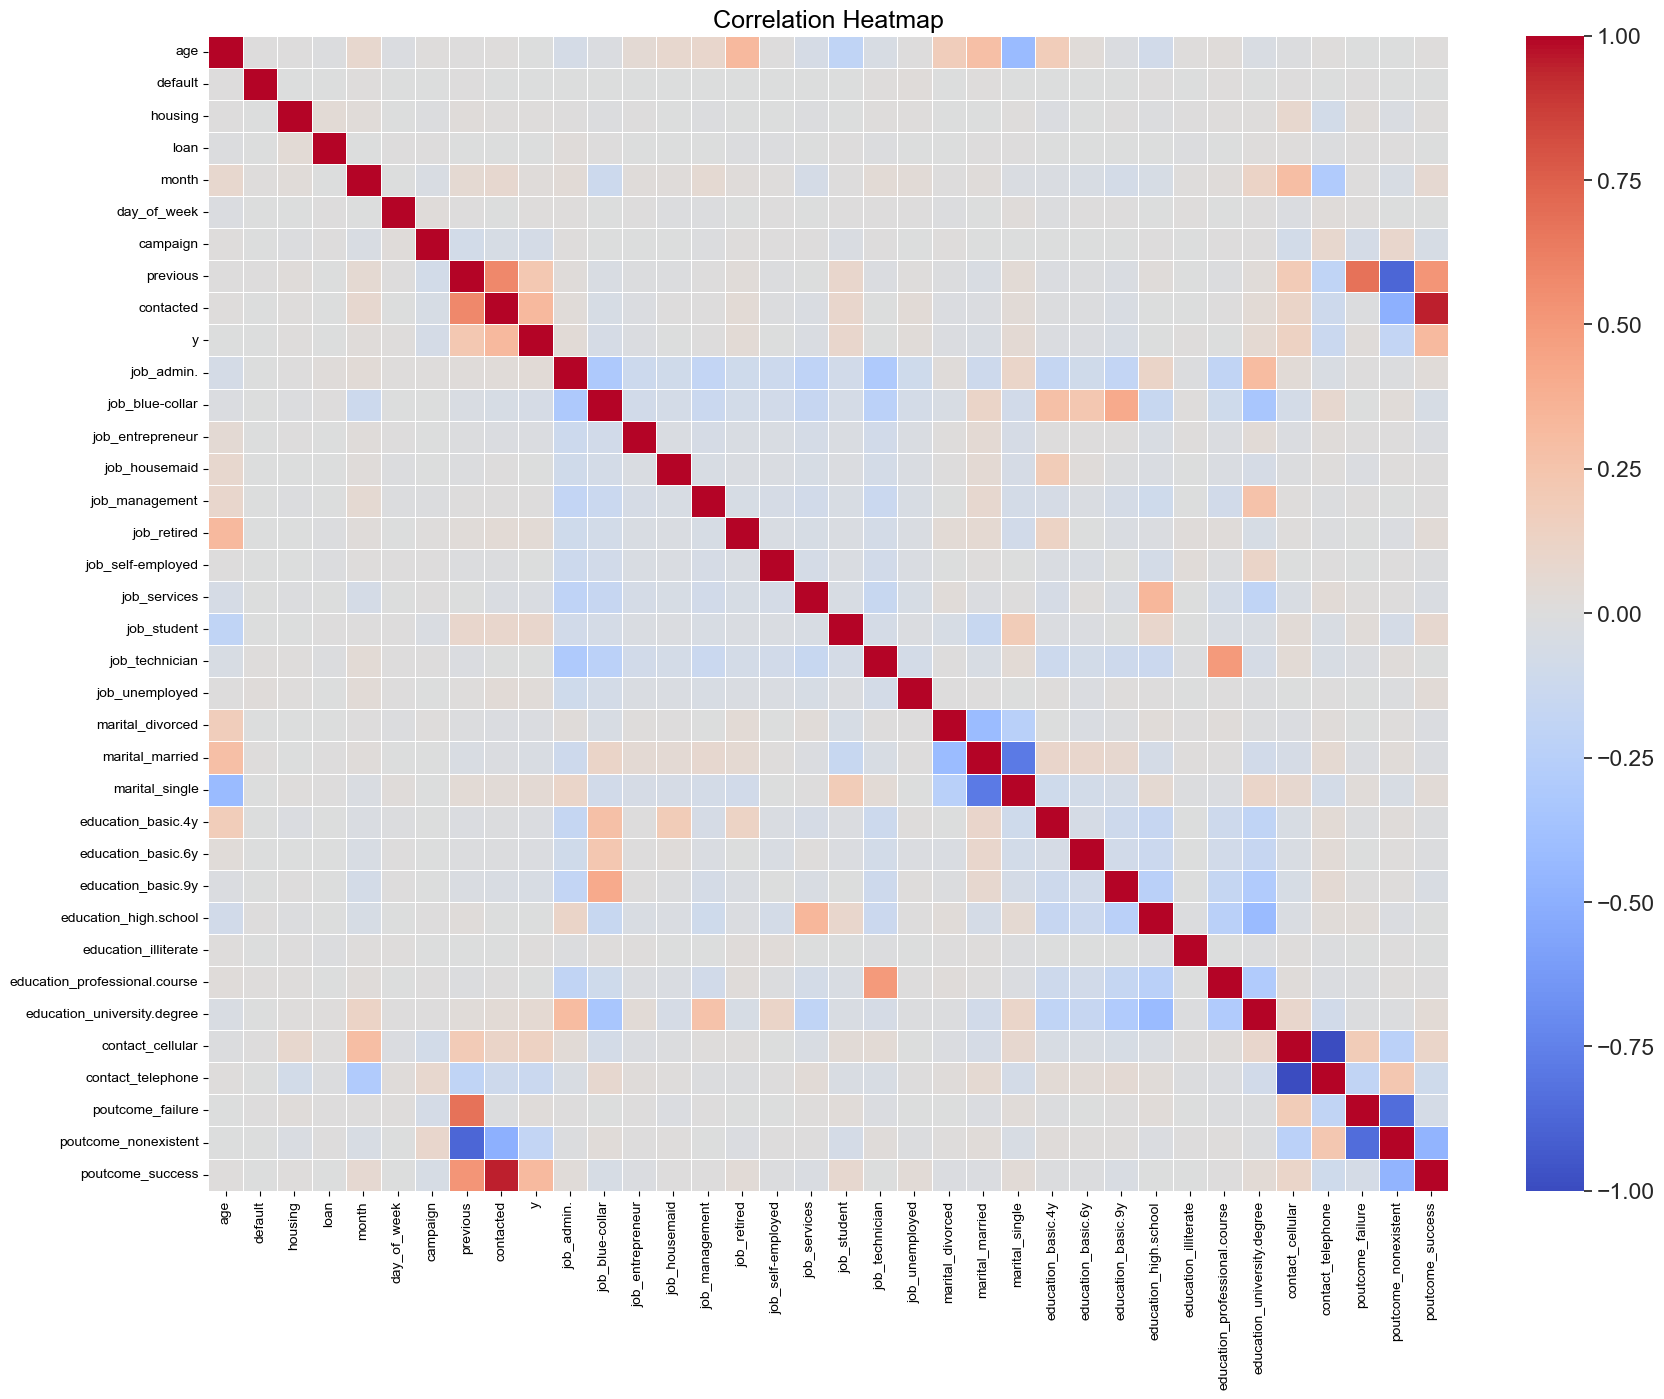

In [40]:
#correlation heatmap

plt.rcdefaults()
#sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots(figsize=(20, 15))

sns.set(font_scale=1.5)
sns.heatmap(df_encoded.corr(), center = 0, linewidth = .5,
            vmin=-1, cmap='coolwarm', annot=False).set(title='Correlation Heatmap');

In [41]:
df_encoded.corr()['y'].abs().sort_values(ascending=False)

y                                1.000000
contacted                        0.321887
poutcome_success                 0.314201
previous                         0.222086
poutcome_nonexistent             0.186111
contact_cellular                 0.139363
contact_telephone                0.139363
job_student                      0.093371
campaign                         0.066246
job_blue-collar                  0.062184
education_university.degree      0.055001
marital_single                   0.053412
job_retired                      0.044316
education_basic.9y               0.041682
marital_married                  0.036023
job_admin.                       0.033801
job_services                     0.031039
job_unemployed                   0.023853
month                            0.022260
poutcome_failure                 0.021996
marital_divorced                 0.021906
education_basic.4y               0.020572
education_basic.6y               0.018585
job_entrepreneur                 0

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

#### 4.1. X-y Definition, with a Feature Selection

In [42]:
X = df_encoded.drop(['y'], axis = 1)
y = df_encoded['y']

#### 4.2 Split the Dataset (Train/Test)
Being the dataset unbalanced, it is important to enable the feature 'stratify' to keep the two partitions (train, test), with similar output proportions. The stratify parameter ensures that the proportion of classes in each split of the data remains consistent with the proportion in the full dataset. This is particularly important in unbalanced datasets to prevent one split from ending up with most or all examples of a minority class, which could lead to biased training or testing performance.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, stratify = y)

# note that we will need to scale our data in order for the models to work
scaler = StandardScaler()
#scaler = StandardScaler(with_mean=False)
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

The "baseline model" basically assumes that the output is always the majority class, "NO" output in this case.

In [44]:
#Baseline

majority_class = y.mode().iloc[0]
baseline_accuracy = (y == majority_class).mean()

In [45]:
print(f'Baseline accuracy using majority class: {baseline_accuracy:.3f}')

Baseline accuracy using majority class: 0.878


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [46]:
#Logistic Regression (not optimized)
lr_model = LogisticRegression(class_weight='balanced', random_state=42)

### Problem 9: Score the Model

What is the accuracy of your model?

In [47]:
start_time = time.time()
lr_model.fit(X_train_scaled, y_train)
end_time = time.time()

In [48]:
lr_duration = end_time - start_time
lr_y_pred = lr_model.predict(X_test_scaled)
lr_y_probs = lr_model.predict_proba(X_test_scaled)[:, 1]  # probabilities for the positive class

lr_train_accuracy  = accuracy_score(y_train, lr_model.predict(X_train_scaled))
lr_test_accuracy = accuracy_score(y_test, lr_y_pred)
lr_recall = recall_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred)
lr_f1 = f1_score(y_test, lr_y_pred)
lr_auc_score = roc_auc_score(y_test, lr_y_probs)

print(f"Train Accuracy: {lr_train_accuracy:.3f}")
print(f"Test Accuracy: {lr_test_accuracy:.3f}")
print(f"Test Recall: {lr_recall:.3f}")
print(f"Test Precision: {lr_precision:.3f}")
print(f"Test F1 Score: {lr_f1:.3f}")
print(f"Test AUC: {lr_auc_score:.3f}")
print("")

print(f'Time to fit: {lr_duration:.3f}')

Train Accuracy: 0.700
Test Accuracy: 0.685
Test Recall: 0.584
Test Precision: 0.212
Test F1 Score: 0.311
Test AUC: 0.702

Time to fit: 0.122


In [49]:
print(f'Logistic Regression is better than Baseline: {lr_test_accuracy > baseline_accuracy}')
print(f'Difference: {lr_test_accuracy - baseline_accuracy:.3f}')

Logistic Regression is better than Baseline: False
Difference: -0.193


Logistic Regression provides a slight improvement over Baseline model.

I also plot a Confusion Matrix to double check the values provided by the above script.

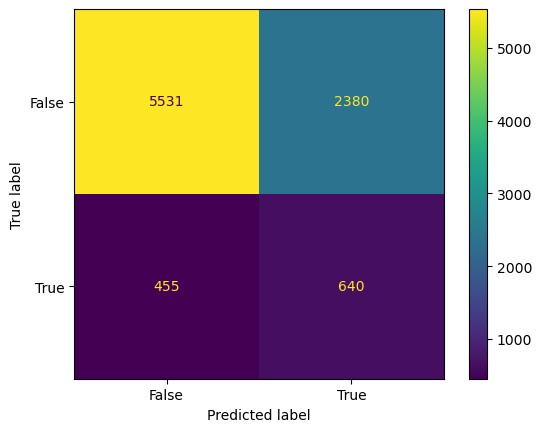

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.rcdefaults()

# Confusion matrix
cm = confusion_matrix(y_test, lr_model.predict(X_test_scaled))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr_model.classes_)
disp.plot()

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

Logistic Regression has been already analyzed in the previous paragraph. The remaining models are exposed in the following.

#### 10.1 KNN

In [51]:
knn_model = KNeighborsClassifier()

In [52]:
start_time = time.time()
knn_model.fit(X_train_scaled, y_train)
end_time = time.time()

In [53]:
knn_duration = end_time - start_time
knn_y_pred = knn_model.predict(X_test_scaled)
knn_y_probs = knn_model.predict_proba(X_test_scaled)[:, 1]  # probabilities for the positive class

knn_train_accuracy  = accuracy_score(y_train, knn_model.predict(X_train_scaled))
knn_test_accuracy = accuracy_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred)
knn_auc_score = roc_auc_score(y_test, knn_y_probs)

print(f"Train Accuracy: {knn_train_accuracy:.3f}")
print(f"Test Accuracy: {knn_test_accuracy:.3f}")
print(f"Test Recall: {knn_recall:.3f}")
print(f"Test Precision: {knn_precision:.3f}")
print(f"Test F1 Score: {knn_f1:.3f}")
print(f"Test AUC: {knn_auc_score:.3f}")
print("")

print(f'Time to fit: {knn_duration:.3f}')

Train Accuracy: 0.899
Test Accuracy: 0.881
Test Recall: 0.181
Test Precision: 0.531
Test F1 Score: 0.270
Test AUC: 0.644

Time to fit: 0.009


#### 10.2 Decision Tree

In [54]:
dt_model = DecisionTreeClassifier(class_weight='balanced')
#dt_model = DecisionTreeClassifier()

In [55]:
start_time = time.time()
dt_model.fit(X_train_scaled, y_train)
end_time = time.time()

In [56]:
dt_duration = end_time - start_time
dt_y_pred = dt_model.predict(X_test_scaled)
dt_y_probs = dt_model.predict_proba(X_test_scaled)[:, 1]  # probabilities for the positive class

dt_train_accuracy  = accuracy_score(y_train, dt_model.predict(X_train_scaled))
dt_test_accuracy = accuracy_score(y_test, dt_y_pred)
dt_recall = recall_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred)
dt_f1 = f1_score(y_test, dt_y_pred)
dt_auc_score = roc_auc_score(y_test, dt_y_probs)

print(f"Train Accuracy: {dt_train_accuracy:.3f}")
print(f"Test Accuracy: {dt_test_accuracy:.3f}")
print(f"Test Recall: {dt_recall:.3f}")
print(f"Test Precision: {dt_precision:.3f}")
print(f"Test F1 Score: {dt_f1:.3f}")
print(f"Test AUC: {dt_auc_score:.3f}")
print("")

print(f'Time to fit: {dt_duration:.3f}')

Train Accuracy: 0.991
Test Accuracy: 0.825
Test Recall: 0.291
Test Precision: 0.284
Test F1 Score: 0.288
Test AUC: 0.596

Time to fit: 0.228


#### 10.3 SVM

In [57]:
svm_model = SVC(class_weight='balanced')

In [58]:
start_time = time.time()
svm_model.fit(X_train_scaled, y_train)
end_time = time.time()

In [59]:
svm_duration = end_time - start_time
svm_y_pred = svm_model.predict(X_test_scaled)
#svm_y_probs = svm_model.predict_proba(X_test_scaled)[:, 1]  # probabilities for the positive class

svm_train_accuracy  = accuracy_score(y_train, svm_model.predict(X_train_scaled))
svm_test_accuracy = accuracy_score(y_test, svm_y_pred)
svm_recall = recall_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)
#svm_auc_score = roc_auc_score(y_test, svm_y_probs)

print(f"Train Accuracy: {svm_train_accuracy:.3f}")
print(f"Test Accuracy: {svm_test_accuracy:.3f}")
print(f"Test Recall: {svm_recall:.3f}")
print(f"Test Precision: {svm_precision:.3f}")
print(f"Test F1 Score: {svm_f1:.3f}")
#print(f"Test AUC: {svm_auc_score:.3f}")
print("")

print(f'Time to fit: {svm_duration:.3f}')

Train Accuracy: 0.769
Test Accuracy: 0.737
Test Recall: 0.552
Test Precision: 0.243
Test F1 Score: 0.337

Time to fit: 37.761


#### Recap Table

In [60]:
consolidated_df = pd.DataFrame({
    'Model': ['Baseline', 'Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
    'Train Time': ['N/A', lr_duration, knn_duration, dt_duration, svm_duration],  
    'Train Accuracy': ['N/A', lr_train_accuracy, knn_train_accuracy, dt_train_accuracy, svm_train_accuracy],  
    'Test Accuracy': [baseline_accuracy, lr_test_accuracy, knn_test_accuracy, dt_test_accuracy, svm_test_accuracy]
})

consolidated_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Baseline,N/A,N/A,0.878377
1,Logistic Regression,0.121661,0.699995,0.685210
2,KNN,0.009008,0.898587,0.880968
3,Decision Tree,0.227779,0.991386,0.824561
4,SVM,37.761295,0.768953,0.736620


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### Classification Metric

Accuracy is not the best metric for unbalanced datasets because it can be misleading and fail to reflect the model's performance on the minority class, which is in this case the class of interest.

In this case metrics like "recall" and "precision" appear more interesting. In detail:

- A high recall ensures that most of the potential new customers are identified. This minimizes the risk of missing out on potential new customers.

- High precision ensures that when the model predicts a customer will accept the coupon, it is usually correct. This helps in minimizing the cost and effort of targeting customers who are unlikely to sign with the bank.

Considering the Business objective, a metric able to minimize the resources invested by the bank seems ideal in this application. I optimize by `precision`.

#### 11.1 Logistic Regression Tuned

In [61]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}

In [62]:
grid = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, verbose=1, scoring='precision')

In [63]:
start_time = time.time()
grid.fit(X_train_scaled, y_train)
end_time = time.time()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [65]:
lr_best_params = grid.best_params_
lr_duration = end_time - start_time
lr_fitTime = grid.cv_results_['mean_fit_time'].max()
lr_y_pred = grid.predict(X_test_scaled)
lr_y_probs = grid.predict_proba(X_test_scaled)[:, 1]  # probabilities for the positive class

lr_train_accuracy  = accuracy_score(y_train, grid.predict(X_train_scaled))
lr_test_accuracy = accuracy_score(y_test, lr_y_pred)
lr_recall = recall_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred)
lr_f1 = f1_score(y_test, lr_y_pred)
lr_auc_score = roc_auc_score(y_test, lr_y_probs)

print(f"Train Accuracy: {lr_train_accuracy:.3f}")
print(f"Test Accuracy: {lr_test_accuracy:.3f}")
print(f"Test Recall: {lr_recall:.3f}")
print(f"Test Precision: {lr_precision:.3f}")
print(f"Test F1 Score: {lr_f1:.3f}")
print(f"Test AUC: {lr_auc_score:.3f}")
print("")

print(f'Best parameters: {lr_best_params}')
print(f'WC Fit Time: {lr_fitTime:.3f}')
print(f'Time to fit: {lr_duration:.3f}')

Train Accuracy: 0.885
Test Accuracy: 0.884
Test Recall: 0.231
Test Precision: 0.555
Test F1 Score: 0.326
Test AUC: 0.665

Best parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
WC Fit Time: 7.028
Time to fit: 113.852


#### 11.2 KNN Tuned

In [66]:
param_grid = {'n_neighbors': range(1, 50, 2)}

In [67]:
grid = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, verbose=1, scoring='precision')

In [68]:
start_time = time.time()
grid.fit(X_train_scaled, y_train)
end_time = time.time()

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [69]:
knn_best_params = grid.best_params_
knn_duration = end_time - start_time
knn_fitTime = grid.cv_results_['mean_fit_time'].max()
knn_y_pred = grid.predict(X_test_scaled)
knn_y_probs = grid.predict_proba(X_test_scaled)[:, 1]  # probabilities for the positive class

knn_train_accuracy  = accuracy_score(y_train, grid.predict(X_train_scaled))
knn_test_accuracy = accuracy_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred)
knn_auc_score = roc_auc_score(y_test, knn_y_probs)

print(f"Train Accuracy: {knn_train_accuracy:.3f}")
print(f"Test Accuracy: {knn_test_accuracy:.3f}")
print(f"Test Recall: {knn_recall:.3f}")
print(f"Test Precision: {knn_precision:.3f}")
print(f"Test F1 Score: {knn_f1:.3f}")
print(f"Test AUC: {knn_auc_score:.3f}")
print("")

print(f'Best parameters: {knn_best_params}')
print(f'WC Fit Time: {knn_fitTime:.3f}')
print(f'Time to fit: {knn_duration:.3f}')

Train Accuracy: 0.890
Test Accuracy: 0.889
Test Recall: 0.181
Test Precision: 0.662
Test F1 Score: 0.284
Test AUC: 0.681

Best parameters: {'n_neighbors': 27}
WC Fit Time: 0.018
Time to fit: 79.911


#### 11.3 Decision Tree Tuned

In [70]:
param_grid = {'max_depth': range(1,20),
          'min_samples_split': [2,4,8],
          'criterion': ['gini', 'entropy'],
          'min_samples_leaf': [1,2,4]
         }

In [71]:
grid = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, verbose=1, scoring='precision')

In [72]:
start_time = time.time()
grid.fit(X_train_scaled, y_train)
end_time = time.time()

Fitting 5 folds for each of 342 candidates, totalling 1710 fits


In [73]:
dt_best_params = grid.best_params_
dt_duration = end_time - start_time
dt_fitTime = grid.cv_results_['mean_fit_time'].max()
dt_y_pred = grid.predict(X_test_scaled)
dt_y_probs = grid.predict_proba(X_test_scaled)[:, 1]  # probabilities for the positive class

dt_train_accuracy  = accuracy_score(y_train, grid.predict(X_train_scaled))
dt_test_accuracy = accuracy_score(y_test, dt_y_pred)
dt_recall = recall_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred)
dt_f1 = f1_score(y_test, dt_y_pred)
dt_auc_score = roc_auc_score(y_test, dt_y_probs)

print(f"Train Accuracy: {dt_train_accuracy:.3f}")
print(f"Test Accuracy: {dt_test_accuracy:.3f}")
print(f"Test Recall: {dt_recall:.3f}")
print(f"Test Precision: {dt_precision:.3f}")
print(f"Test F1 Score: {dt_f1:.3f}")
print(f"Test AUC: {dt_auc_score:.3f}")
print("")

print(f'Best parameters: {dt_best_params}')
print(f'WC Fit Time: {dt_fitTime:.3f}')
print(f'Time to fit: {dt_duration:.3f}')

Train Accuracy: 0.889
Test Accuracy: 0.889
Test Recall: 0.205
Test Precision: 0.632
Test F1 Score: 0.310
Test AUC: 0.594

Best parameters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
WC Fit Time: 0.135
Time to fit: 112.625


#### SVM Tuned

In [74]:
param_grid = {
            #'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
            'gamma': [0.00001, 0.001, 0.1]
            }

In [75]:
grid = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, verbose=3, scoring='precision')

In [76]:
start_time = time.time()
grid.fit(X_train_scaled, y_train)
end_time = time.time()

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .......................gamma=1e-05;, score=0.604 total time=  39.8s
[CV 2/5] END .......................gamma=1e-05;, score=0.607 total time=  43.6s
[CV 3/5] END .......................gamma=1e-05;, score=0.645 total time=  38.3s
[CV 4/5] END .......................gamma=1e-05;, score=0.639 total time=  39.4s
[CV 5/5] END .......................gamma=1e-05;, score=0.614 total time=  40.7s
[CV 1/5] END .......................gamma=0.001;, score=0.240 total time=  34.5s
[CV 2/5] END .......................gamma=0.001;, score=0.256 total time=  32.2s
[CV 3/5] END .......................gamma=0.001;, score=0.298 total time=  35.5s
[CV 4/5] END .......................gamma=0.001;, score=0.243 total time=  35.0s
[CV 5/5] END .......................gamma=0.001;, score=0.262 total time=  33.3s
[CV 1/5] END .........................gamma=0.1;, score=0.214 total time=  32.2s
[CV 2/5] END .........................gamma=0.1;,

In [77]:
svm_best_params = grid.best_params_
svm_duration = end_time - start_time
svm_fitTime = grid.cv_results_['mean_fit_time'].max()
svm_y_pred = grid.predict(X_test_scaled)
#svm_y_probs = grid.predict_proba(X_test_scaled)[:, 1]  # probabilities for the positive class

svm_train_accuracy  = accuracy_score(y_train, grid.predict(X_train_scaled))
svm_test_accuracy = accuracy_score(y_test, svm_y_pred)
svm_recall = recall_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)
#svm_auc_score = roc_auc_score(y_test, svm_y_probs)

print(f"Train Accuracy: {svm_train_accuracy:.3f}")
print(f"Test Accuracy: {svm_test_accuracy:.3f}")
print(f"Test Recall: {svm_recall:.3f}")
print(f"Test Precision: {svm_precision:.3f}")
print(f"Test F1 Score: {svm_f1:.3f}")
#print(f"Test AUC: {svm_auc_score:.3f}")
print("")

print(f'Best parameters: {svm_best_params}')
print(f'WC Fit Time: {svm_fitTime:.3f}')
print(f'Time to fit: {svm_duration:.3f}')

Train Accuracy: 0.888
Test Accuracy: 0.887
Test Recall: 0.209
Test Precision: 0.601
Test F1 Score: 0.310

Best parameters: {'gamma': 1e-05}
WC Fit Time: 31.471
Time to fit: 575.183


#### Recap after Tuning

In [78]:
consolidated_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
    'GSCV Time (s)': [lr_duration, knn_duration, dt_duration, svm_duration],  
    'Fit Time (s)': [lr_fitTime, knn_fitTime, dt_fitTime, svm_fitTime],
    'Test Accuracy': [lr_test_accuracy, knn_test_accuracy, dt_test_accuracy, svm_test_accuracy],
    'Test Precision': [lr_precision, knn_precision, dt_precision, svm_precision]
})

consolidated_df

,Model,GSCV Time (s),Fit Time (s),Test Accuracy,Test Precision
0,Logistic Regression,113.851654,7.028314,0.883966,0.554825
1,KNN,79.910986,0.017573,0.889185,0.662207
2,Decision Tree,112.624792,0.135129,0.888852,0.632022
3,SVM,575.183192,31.470885,0.886964,0.601050


### Conclusions

The dataset is very unbalanced, with more than 80% of rows referring to potential customers who didn't subscribe a deposit. Because of this, "accuracy" is not a reliable metric: all the models investigated provide high values, but this is a metric highly influenced by the majority group (i.e. people who didn't subscribe a deposit). Prove of this is the baseline metric: a model always predicting the majority group ("no") already provides an accuracy pretty high.

To achieve the Business Objective a more meaningful metric is required. "Precision" ensures that when the model predicts a customer will accept the coupon, it is usually correct. This helps in minimizing the cost and effort of targeting customers who are unlikely to sign with the bank.

Considering the Business objective, a metric able to minimize the resources invested by the bank seems ideal. According to this approach, an optimized KNN model provides the highest value of precision (66%), with a not negligeble efficiency in term of elapsed time. Another valuable option is the Decision Tree, with a slighly lower precision (63%) and twice the time to fit; its recall is a bit higher though. Logistic Regression provides a fit time similar to decision tree, but with a worse precision. SVM provides a not very high precision value, with a huge time required to fit: not a recommended option.

### Next Steps
Considering the very unbalanced nature of this dataset, I would recommend to take actions to "rebalance" it. This means adopting techniques of oversampling (for minority group) or undersampling (for majority group). I tried something during this analysis but I didn't trust the results. A more methodic approach should be developed in this topic.